In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from skimage.color import gray2rgb

In [2]:
# load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# dataset shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

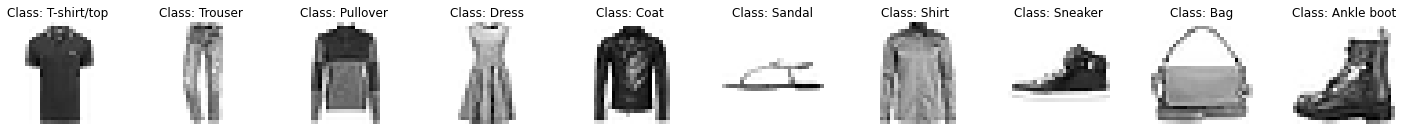

In [5]:
# set random seed
np.random.seed(100)

# choose some examples to visualize
examples = []
for i in range(len(class_names)):
    indexes = np.where(y_test == i)
    all_indexes = np.hstack(indexes)
    examples.append(np.random.choice(all_indexes))

# show examples
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
fig.tight_layout()
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[examples][i], cmap=plt.cm.binary)
    ax.title.set_text(f'Class: {class_names[y_test[examples][i]]}')
    ax.axis('off')

In [6]:
# normalization
X_train = X_train / 255
X_test = X_test / 255

# X_train = np.array([gray2rgb(img) for img in X_train])
# X_test = np.array([gray2rgb(img) for img in X_test])

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [8]:
np.shape(X_train)[1:]

(28, 28)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
# train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5070 - accuracy: 0.8217 - val_loss: 0.4041 - val_accuracy: 0.8543
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8638 - val_loss: 0.3519 - val_accuracy: 0.8698
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8779 - val_loss: 0.3408 - val_accuracy: 0.8745
Epoch 4/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3140 - accuracy: 0.8850 - val_loss: 0.3426 - val_accuracy: 0.8800
Epoch 5/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2945 - accuracy: 0.8913 - val_loss: 0.3709 - val_accuracy: 0.8648
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.8947 - val_loss: 0.3206 - val_accuracy: 0.8848
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2698 - accuracy: 0.9001 - val_loss: 0.3580 - val_accuracy:

Test loss: 0.36120685935020447
Test accuracy: 0.886900007724762 



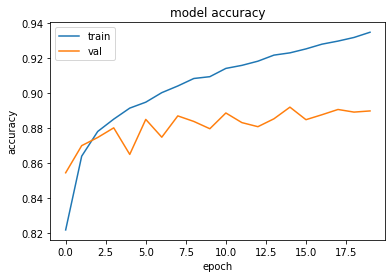

In [12]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=False)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc, '\n')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()